<a href="https://colab.research.google.com/github/ayushxx7/pandas-course-project/blob/master/Market_Association_Grocery_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grocery Data Analysis**
### Market Association

## Data Prepartion

### Setup 

#### Imports

In [22]:
# Imports
import json
import zipfile
import os
from collections import Counter
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

### Cofiguring Kaggle, Downloading and Extracting Dataset

In [2]:
!pip install kaggle
api_token = {"username":"ayushxx7","key":"32c5490ba78a5c6e8eaa81a18380c7dd"}
!mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d heeraldedhia/groceries-dataset

for file in os.listdir():
    if '.zip' in file:
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

kaggle.json
  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 37.8MB/s]


In [3]:
df = pd.read_csv('Groceries_dataset.csv')
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Find out items that are frequently bought together

> Group by customer ID and date
- Find max count (which items are most associated)
- remove outliers

### Find out which items are most popular

In [4]:
# Checking whether any incorrect value is present
for item in df.itemDescription.unique():
  print(item)

tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
pot plants
citrus fruit
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese 
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female sanitary products
cling film/bags
soap
fro

In [5]:
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

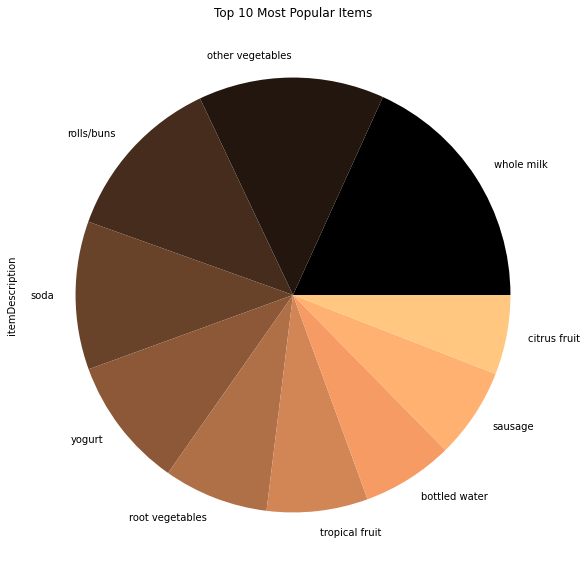

In [6]:
df.itemDescription.value_counts()[:10].plot(kind='pie', figsize=(10,10), colormap='copper', title="Top 10 Most Popular Items")

The most selling product is `Whole Milk` (sold 2500+).

### Find out customers that are most loyal


In [7]:
df.Member_number.value_counts()

3180    36
3050    33
2051    33
3737    33
2433    31
        ..
4565     2
2373     2
3788     2
2614     2
2844     2
Name: Member_number, Length: 3898, dtype: int64

In [8]:
df[['Member_number', 'Date']].groupby(by=['Member_number', 'Date']).size()

Member_number  Date      
1000           15-03-2015    4
               24-06-2014    3
               24-07-2015    2
               25-11-2015    2
               27-05-2015    2
                            ..
4999           24-01-2015    6
               26-12-2015    2
5000           09-03-2014    2
               10-02-2015    3
               16-11-2014    2
Length: 14963, dtype: int64

In [9]:
df.groupby(['Member_number', 'Date']).size().reset_index(name='counts')

,Member_number,Date,counts
0,1000,15-03-2015,4
1,1000,24-06-2014,3
2,1000,24-07-2015,2
3,1000,25-11-2015,2
4,1000,27-05-2015,2
...,...,...,...
14958,4999,24-01-2015,6
14959,4999,26-12-2015,2
14960,5000,09-03-2014,2
14961,5000,10-02-2015,3


In [10]:
new_df = df.groupby(['Member_number', 'Date']).size().reset_index(name='counts')
new_df.head()

,Member_number,Date,counts
0,1000,15-03-2015,4
1,1000,24-06-2014,3
2,1000,24-07-2015,2
3,1000,25-11-2015,2
4,1000,27-05-2015,2


In [11]:
for key in new_df:
  print(key)

Member_number
Date
counts


In [12]:
most_loyal_df = new_df.groupby(['Member_number']).count()
max_count = new_df.groupby(['Member_number']).count().max()[0]
most_loyal = most_loyal_df.loc[most_loyal_df['counts'] == max_count]

In [13]:
print(f"There are {len(most_loyal)} loyal customers")
print("The following are their member IDs")
for index, member in most_loyal.iterrows():
  print(index)
print("All of them made a purchase on", max_count, "unique days")

There are 5 loyal customers
The following are their member IDs
1379
2193
2271
3737
4338
All of them made a purchase on 11 unique days


In [14]:
grouped_df = df.groupby(['Member_number']).size().reset_index(name="count")
print(grouped_df)
df2 = grouped_df.loc[grouped_df['Member_number'].isin([1379, 2193, 2271, 3737, 4338])]

      Member_number  count
0              1000     13
1              1001     12
2              1002      8
3              1003      8
4              1004     21
...             ...    ...
3893           4996     10
3894           4997      6
3895           4998      2
3896           4999     16
3897           5000      7

[3898 rows x 2 columns]


In [15]:
df3 = df2.sort_values(by=['count'], ascending=False)
print(df3)

      Member_number  count
2665           3737     33
1234           2271     31
369            1379     28
3250           4338     28
1159           2193     27


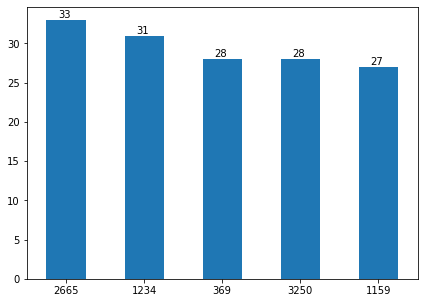

In [16]:
ax = df3['count'].plot(kind="bar", figsize=(7,5), rot=0)
x_offset = -0.10
y_offset = 0.25
for p in ax.patches:
  b = p.get_bbox()
  val = "{:d}".format(int(b.y1 + b.y0))
  ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

Among the most loyal people, we found that Customer Number: 2665, made the most purchases (33). Hence, `2665` is the most valuable customer for the shop.

### Find out best day and worst day for the seller
- Best Individual Date
- Best Day of the Month

In [23]:
date_df = df.groupby(['Date']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

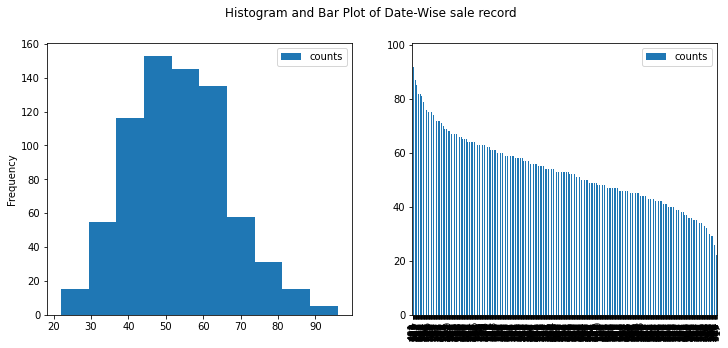

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(12,5))
plt.suptitle('Histogram and Bar Plot of Date-Wise sale record')
date_df.plot(kind='hist', ax=ax1)
date_df.plot(kind='bar', ax=ax2)

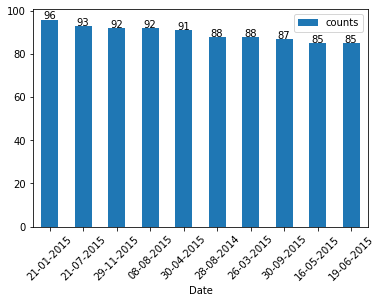

In [25]:
ax = date_df.head(10).plot(kind='bar', x="Date", rot=45)
x_offset = -0.2
y_offset = 0.25
for p in ax.patches:
  b = p.get_bbox()
  val = "{:d}".format(int(b.y1 + b.y0))
  ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [26]:
print(f"The best date on which {date_df.iloc[0]['counts']} items were sold is {date_df.iloc[0]['Date']}")

The best date on which 96 items were sold is 21-01-2015


### To analyze the frequency of items that are purchased/sold together

- Create a mapping for how many items each ,member purchased on any particular day

In [27]:
date_item = {}
for index, row in df.iterrows():
  # print(row[0], row[1], row[2])
  member = row[0]
  date = row[1]
  item = row[2]
  if (member, date) in date_item:
    date_item[(member, date)].append(item)
  else:
    date_item[(member, date)] = [item]
print(date_item)

{(1808, '21-07-2015'): ['tropical fruit', 'rolls/buns', 'candy'], (2552, '05-01-2015'): ['whole milk', 'tropical fruit', 'chocolate'], (2300, '19-09-2015'): ['pip fruit', 'other vegetables', 'flour'], (1187, '12-12-2015'): ['other vegetables', 'onions', 'shopping bags'], (3037, '01-02-2015'): ['whole milk', 'other vegetables', 'white bread'], (4941, '14-02-2015'): ['rolls/buns', 'citrus fruit', 'fruit/vegetable juice'], (4501, '08-05-2015'): ['other vegetables', 'bottled water', 'shopping bags'], (3803, '23-12-2015'): ['pot plants', 'citrus fruit', 'whipped/sour cream'], (2762, '20-03-2015'): ['whole milk', 'specialty bar', 'newspapers'], (4119, '12-02-2015'): ['tropical fruit', 'citrus fruit', 'soda'], (1340, '24-02-2015'): ['citrus fruit', 'rolls/buns', 'pastry'], (2193, '14-04-2015'): ['beef', 'bottled beer', 'specialty chocolate', 'yogurt', 'whole milk'], (1997, '21-07-2015'): ['frankfurter', 'soda', 'canned beer', 'white bread', 'brown bread'], (4546, '03-09-2015'): ['chicken', 't

- Once the mapping is generated, sort the values in each list (Preparing data for comparison)

In [28]:
for key, mapping in date_item.items():
  mapping.sort()
print(date_item)

{(1808, '21-07-2015'): ['candy', 'rolls/buns', 'tropical fruit'], (2552, '05-01-2015'): ['chocolate', 'tropical fruit', 'whole milk'], (2300, '19-09-2015'): ['flour', 'other vegetables', 'pip fruit'], (1187, '12-12-2015'): ['onions', 'other vegetables', 'shopping bags'], (3037, '01-02-2015'): ['other vegetables', 'white bread', 'whole milk'], (4941, '14-02-2015'): ['citrus fruit', 'fruit/vegetable juice', 'rolls/buns'], (4501, '08-05-2015'): ['bottled water', 'other vegetables', 'shopping bags'], (3803, '23-12-2015'): ['citrus fruit', 'pot plants', 'whipped/sour cream'], (2762, '20-03-2015'): ['newspapers', 'specialty bar', 'whole milk'], (4119, '12-02-2015'): ['citrus fruit', 'soda', 'tropical fruit'], (1340, '24-02-2015'): ['citrus fruit', 'pastry', 'rolls/buns'], (2193, '14-04-2015'): ['beef', 'bottled beer', 'specialty chocolate', 'whole milk', 'yogurt'], (1997, '21-07-2015'): ['brown bread', 'canned beer', 'frankfurter', 'soda', 'white bread'], (4546, '03-09-2015'): ['brown bread'

- Since member number and date have no relevant once the grouping is complete, we can drop these values. 
- In other words, we can create a list of sublists containing only the item combinations.

In [29]:
list_of_list = []
for key, mapping in date_item.items():
  list_of_list.append(mapping)

- Convert the list of list to tuple, so that Counter can be applied to it

In [30]:
converted_to_tuple = map(tuple, list_of_list)
counter_obj = Counter(converted_to_tuple)
print("The top 5 most common combinations:")
for key, value in counter_obj.most_common(5):
  print(key, 'combination was bought', value, 'times')

The top 5 most common combinations:
('other vegetables', 'whole milk') combination was bought 85 times
('rolls/buns', 'whole milk') combination was bought 54 times
('other vegetables', 'rolls/buns') combination was bought 50 times
('other vegetables', 'soda') combination was bought 49 times
('soda', 'whole milk') combination was bought 46 times


In [31]:
item_pair = []
for key, mapping in date_item.items():
  item_pair.append(list(combinations(mapping, 2)))

In [32]:
expanded_mapping = []
for item_tuple in item_pair:
  for item_combo in item_tuple:
    expanded_mapping.append(item_combo)

In [33]:
converted_to_tuple = map(tuple, expanded_mapping)
counter_obj = Counter(converted_to_tuple)
print("The top 5 most common combinations after expansion:")
for key, value in counter_obj.most_common(5):
  print(key, 'combination was bought', value, 'times')

The top 5 most common combinations after expansion:
('other vegetables', 'whole milk') combination was bought 243 times
('rolls/buns', 'whole milk') combination was bought 227 times
('soda', 'whole milk') combination was bought 199 times
('whole milk', 'yogurt') combination was bought 183 times
('other vegetables', 'rolls/buns') combination was bought 182 times


#### Analyzing Date Pattern of Most Frequently bought combination

In [34]:
# Grouping data based on member and date purchased
date_item = {}
for index, row in df.iterrows():
  # print(row[0], row[1], row[2])
  member = row[0]
  date = row[1]
  item = row[2]
  if (member, date) in date_item:
    date_item[(member, date)].append(item)
  else:
    date_item[(member, date)] = [item]

for key, mapping in date_item.items():
  mapping.sort()

In [35]:
# Expanding
item_pair = {}
for key, mapping in date_item.items():
  item_pair[key] = list(combinations(mapping, 2))
print(item_pair)

{(1808, '21-07-2015'): [('candy', 'rolls/buns'), ('candy', 'tropical fruit'), ('rolls/buns', 'tropical fruit')], (2552, '05-01-2015'): [('chocolate', 'tropical fruit'), ('chocolate', 'whole milk'), ('tropical fruit', 'whole milk')], (2300, '19-09-2015'): [('flour', 'other vegetables'), ('flour', 'pip fruit'), ('other vegetables', 'pip fruit')], (1187, '12-12-2015'): [('onions', 'other vegetables'), ('onions', 'shopping bags'), ('other vegetables', 'shopping bags')], (3037, '01-02-2015'): [('other vegetables', 'white bread'), ('other vegetables', 'whole milk'), ('white bread', 'whole milk')], (4941, '14-02-2015'): [('citrus fruit', 'fruit/vegetable juice'), ('citrus fruit', 'rolls/buns'), ('fruit/vegetable juice', 'rolls/buns')], (4501, '08-05-2015'): [('bottled water', 'other vegetables'), ('bottled water', 'shopping bags'), ('other vegetables', 'shopping bags')], (3803, '23-12-2015'): [('citrus fruit', 'pot plants'), ('citrus fruit', 'whipped/sour cream'), ('pot plants', 'whipped/sour

In [36]:
count = 0
date_list = []
for key, mapping in item_pair.items():
  # print(mapping, type(mapping))
  if ('other vegetables', 'whole milk') in mapping:
    count += 1
    date_list.append(key[1])
print(date_list)

['01-02-2015', '11-03-2015', '20-01-2015', '01-07-2015', '19-08-2015', '25-08-2015', '24-06-2015', '19-04-2015', '05-12-2015', '01-04-2015', '08-02-2015', '09-01-2015', '04-04-2015', '01-02-2015', '18-04-2015', '13-01-2015', '30-09-2015', '29-09-2015', '15-08-2015', '10-04-2015', '24-05-2015', '25-10-2015', '26-09-2015', '09-04-2015', '02-11-2015', '13-02-2015', '23-12-2015', '24-05-2015', '09-12-2015', '27-12-2015', '15-05-2015', '23-08-2015', '07-10-2015', '24-04-2015', '14-04-2015', '09-11-2015', '01-07-2015', '15-01-2015', '05-10-2015', '19-08-2015', '18-11-2015', '17-10-2015', '24-01-2015', '25-05-2015', '11-11-2015', '23-09-2015', '25-10-2015', '23-02-2015', '21-05-2015', '04-08-2015', '13-11-2015', '14-08-2015', '15-12-2015', '16-07-2015', '13-02-2015', '28-06-2015', '10-10-2015', '14-06-2015', '19-12-2015', '06-11-2015', '06-04-2015', '15-10-2015', '10-06-2015', '06-01-2015', '16-05-2015', '29-04-2015', '18-09-2015', '15-06-2015', '06-05-2015', '03-12-2015', '06-03-2015', '23-0

In [37]:
month_list = []
for date in date_list:
  month = date.split('-')[1]
  month_list.append(month)

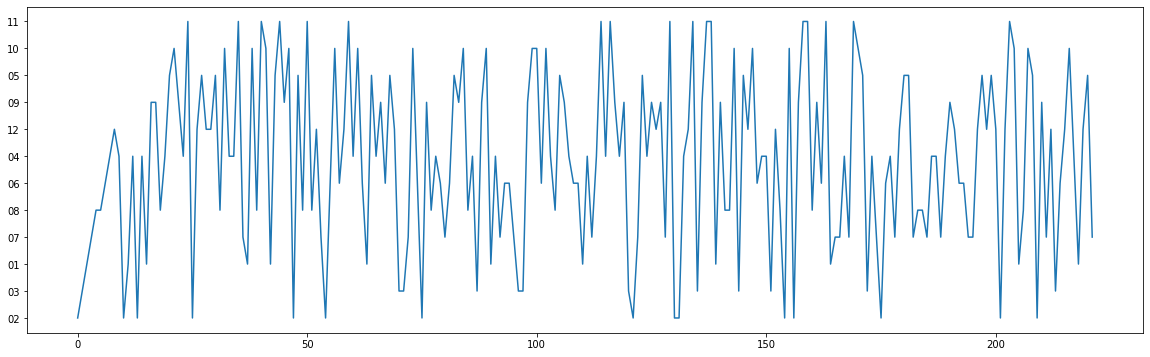

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(month_list)
plt.show()

It seems like data is uniformly distributed without any trend.

# Apriopri

### Affinity analysis
Affinity analysis is a data analysis and data mining technique that discovers co-occurrence relationships among activities performed by (or recorded about) specific individuals or groups. In general, this can be applied to any process where agents can be uniquely identified and information about their activities can be recorded. In retail, affinity analysis is used to perform market basket analysis, in which retailers seek to understand the purchase behavior of customers.

### Association Rule Mining
Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

### Apriori Algorithm
Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

#### Support: 
This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

#### Confidence: 
This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

#### Lift: 
This says how likely item Y is purchased when item X is purchased while controlling for how popular item Y is

In [ ]:
from mixte

In [41]:
basket = df
transactions = [a[1]['itemDescription'].tolist() for a in list(basket.groupby(['Member_number','Date']))]
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

NameError: ignored

## References
- [Download dataset from Kaggle](https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27#gistcomment-3509158)
- [How to plot value_counts](https://mode.com/python-tutorial/counting-and-plotting-in-python/#visualizing-data-with-plot)
- [Colorscheme](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
- [Pandas documentation for Plots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- [Group data based on multiple columns](https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby)
- [Generate count dataframe over a column](https://www.geeksforgeeks.org/getting-frequency-counts-of-a-columns-in-pandas-dataframe/)
- [Filter out dataframe rows based on column values](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)
- [In-built method - Sorted](https://docs.python.org/3/howto/sorting.html)
- [Sort vs Sorted](https://discuss.codecademy.com/t/what-is-the-difference-between-sort-and-sorted/349679)
- [How to run Counter on list of list](https://stackoverflow.com/questions/45019607/count-occurrence-of-a-list-in-a-list-of-lists)
- [Calculating combinations](https://www.geeksforgeeks.org/permutation-and-combination-in-python/)

- [DataSet Visualization](https://www.kaggle.com/cemhansenol98/python-apriori-rare-visualization)

- [DataSet Vis #2](https://www.kaggle.com/samueljones1/market-basket-analysis-using-apriori-algorithm)

- [Rotate xticks in Pandas Bar Plot](https://stackoverflow.com/a/32244161/7048915)

- [String formatting](https://www.w3schools.com/python/ref_string_format.asp)

- [Annotate bars with value in bar plot](https://stackoverflow.com/a/39621872/7048915)